# Final Project PZSIB

#### Kelompok :
- Damar Amarsa Ajiputra
- Dea Salsa Nisrina H.

Mentor : Rachmadio Noval

Dataset: Customer Churn (https://www.kaggle.com/datasets/barun2104/telecom-churn/code?datasetId=567482)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('telecom_churn.csv')

## EDA

In [3]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


- Churn           : 1 jika customer churn, 0 jika tidak
- AccountWeeks    : Jumlah mingguan customer memiliki akun aktif
- ContractRenewal : 1 jika customer baru saja memperbarui kontrak, 0 jika tidak
- DataPlan        : 1 jika customer memiliki paket data, 0 jika tidak
- DataUsage       : penggunaan gigabyte data dalam 1 bulan
- CustServCalls   : Jumlah panggilan menuju customer service
- DayMins         : Rata-rata menit harian dalam 1 bulan
- DayCalls        : Rata-rata jumlah panggilan harian
- MonthlyCharge   : Rata-rata tagihan bulanan
- OverageFee      : biaya berlebih terbesar dalam 12 bulan terakhir
- RoamMins        : Rata-rata jumlah menit roaming

In [4]:
df.shape

(3333, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


Dalam Data Frame terdapat 11 Columns dan 3333 Rows. ***Tidak ada Missing Value*** dalam dataframe, dan semua data merupakan ***Numerical***

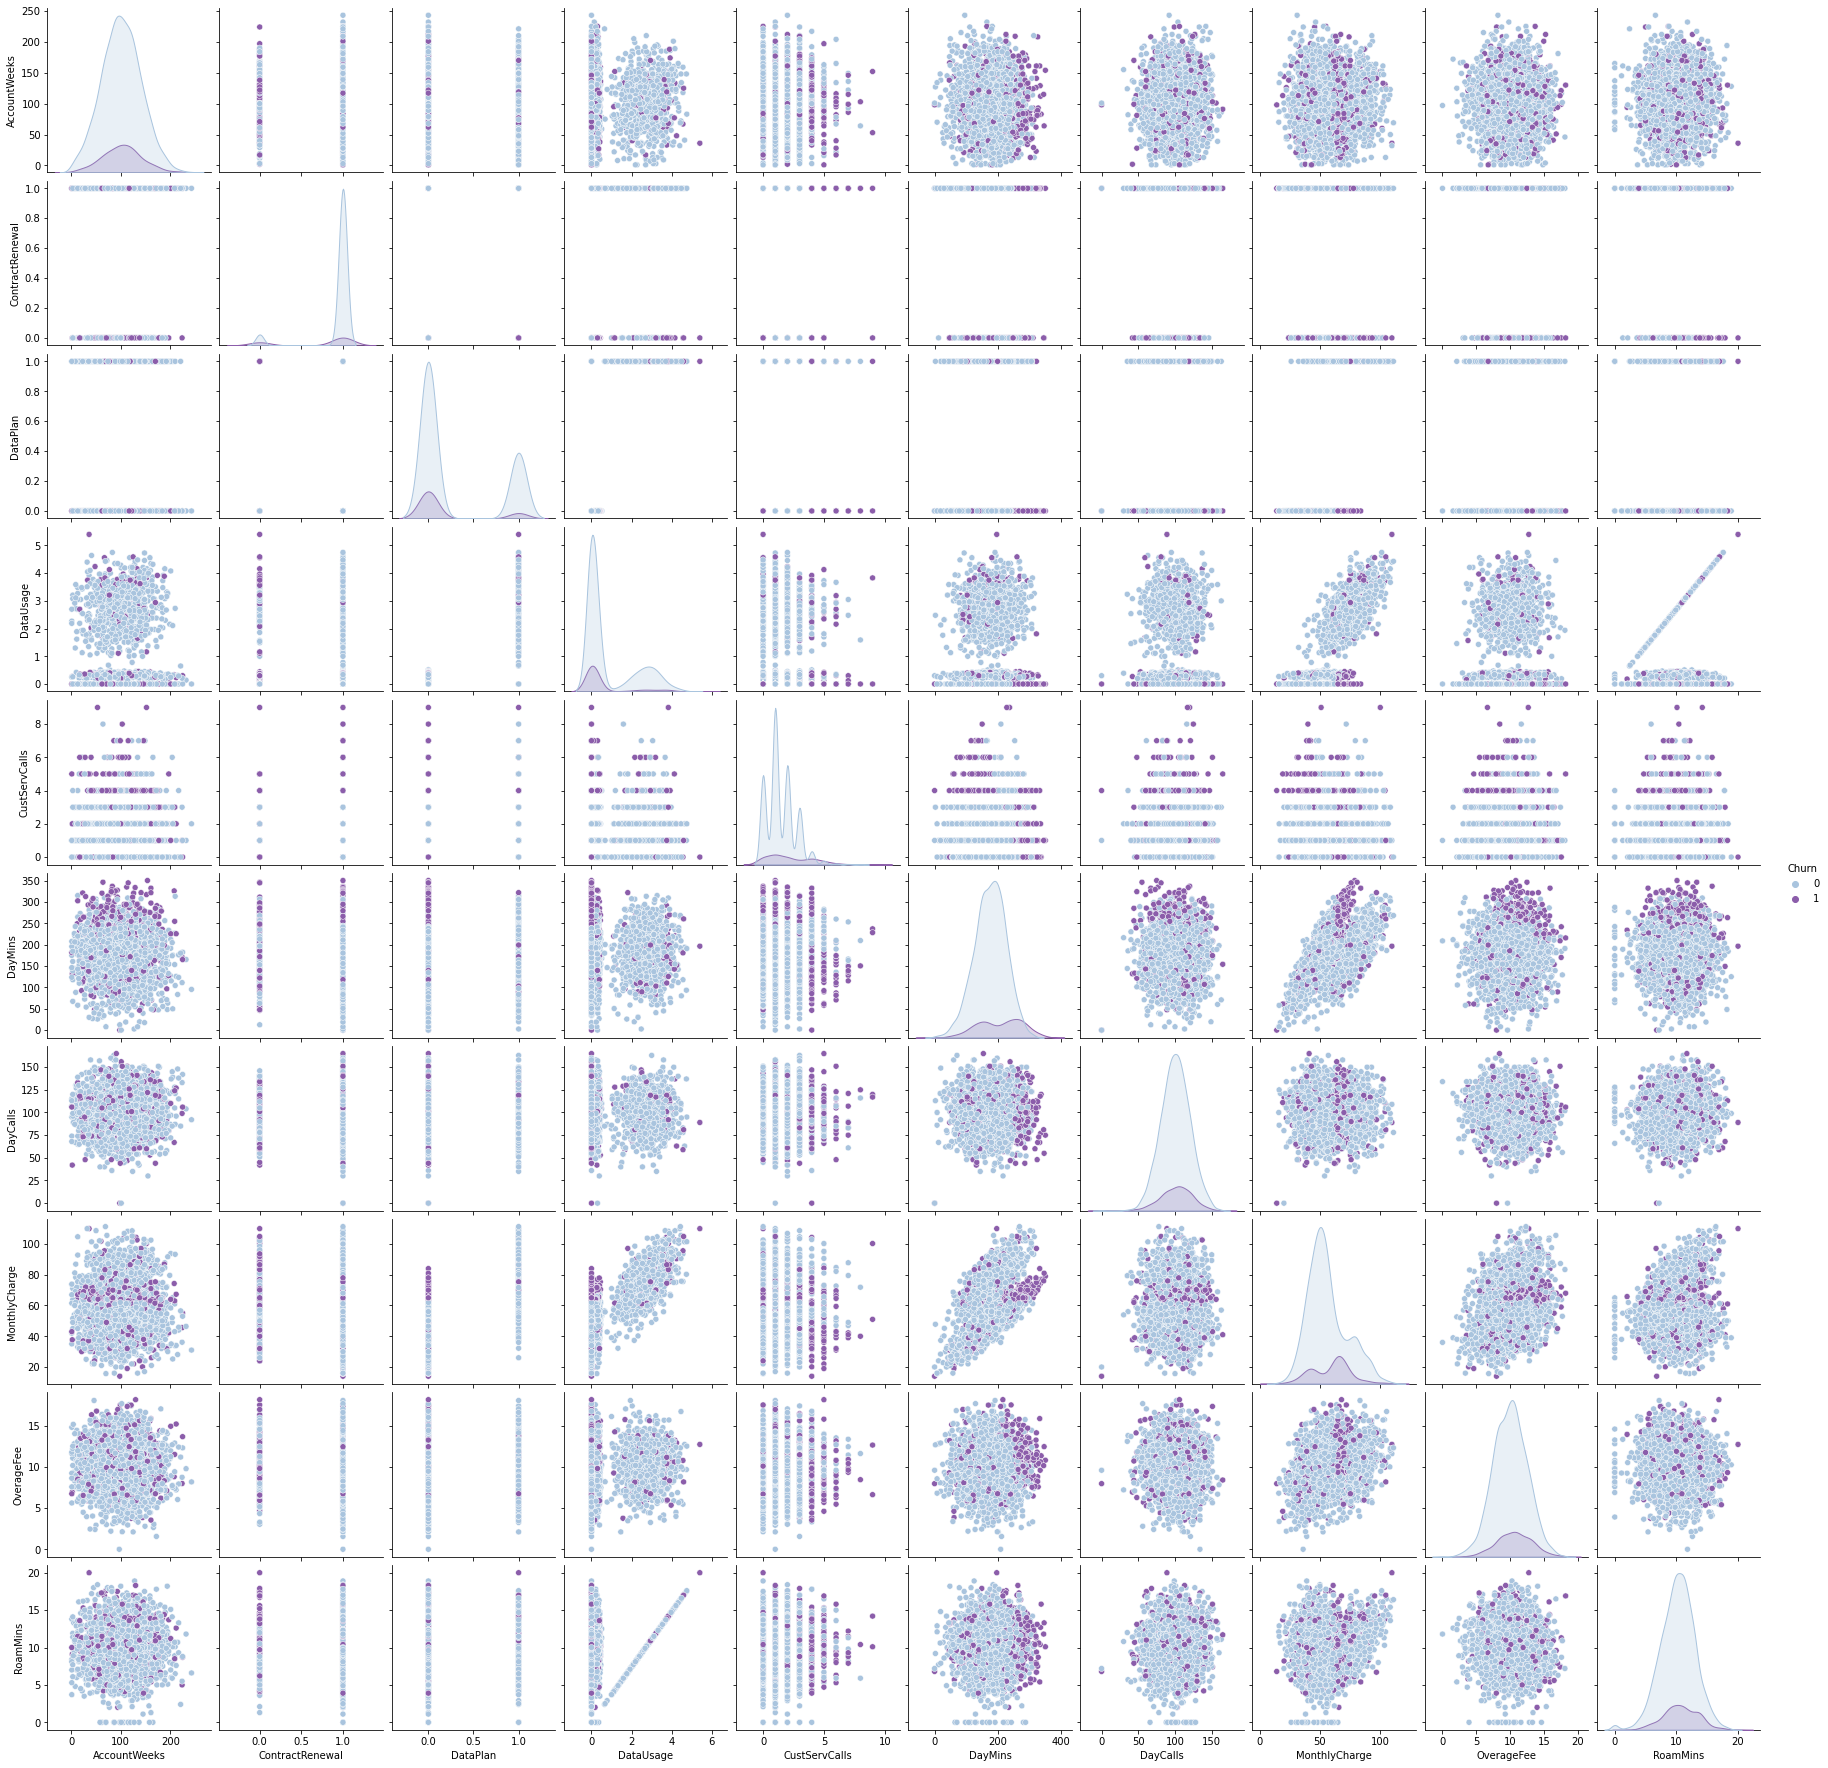

In [7]:
#Distribusi
sns.pairplot(df, hue="Churn",palette='BuPu')

<AxesSubplot:>

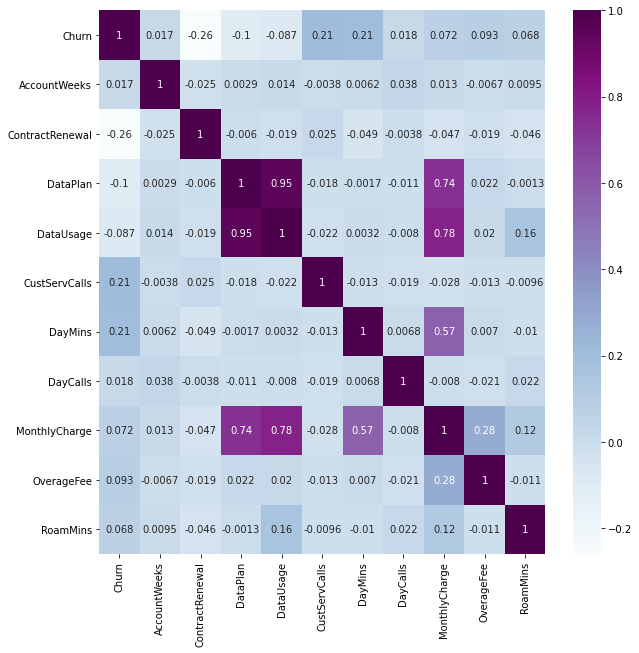

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap="BuPu")

Terdapat korelasi yang sangat kuat dengan DataUsage dan DataPlan. Korelasi terkuat berikutnya adalah antara Penggunaan Data (DataPlan, DataUsage, DayMins) dan MonthlyCharge. Korelasi kuat antara OverageFee dan MonthlyCharge disebabkan oleh pelanggan dengan pembelanjaan yang lebih tinggi menjadi lebih mungkin untuk dikenakan dan overage charge.

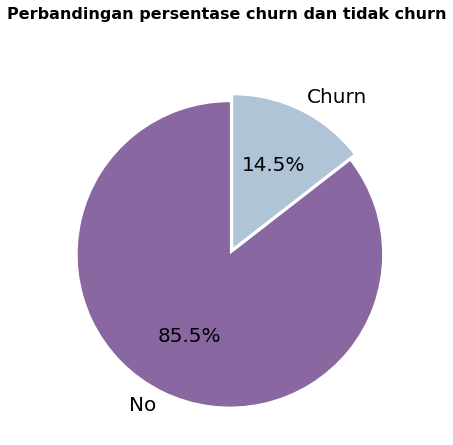

In [9]:
labels = ['No', 'Churn']
sizes = df['Churn'].value_counts(sort = True)

color1="#8967a1"
color2="#b0c4d7"
colors = [color1,color2]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle("Perbandingan persentase churn dan tidak churn",size = 16,  weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={"fontsize":20})

plt.show()

### Data Biner

Melihat insight dari data biner, yaitu ***ContractRenewal*** dan ***DataPlan***

In [10]:
pd.crosstab(df['ContractRenewal'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1)

Churn,0,1
ContractRenewal,,
0,57.585139,42.414861
1,88.504983,11.495017


In [11]:
pd.crosstab(df['ContractRenewal'], df['Churn'])

Churn,0,1
ContractRenewal,,
0,186,137
1,2664,346


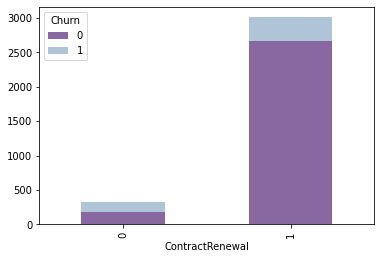

In [12]:
pd.crosstab(df['ContractRenewal'], df['Churn']).plot(kind = 'bar', stacked = True,color=colors)
plt.show()

In [13]:
pd.crosstab(df['DataPlan'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1)

Churn,0,1
DataPlan,,
0,83.284944,16.715056
1,91.323210,8.676790


In [14]:
pd.crosstab(df['DataPlan'], df['Churn'])

Churn,0,1
DataPlan,,
0,2008,403
1,842,80


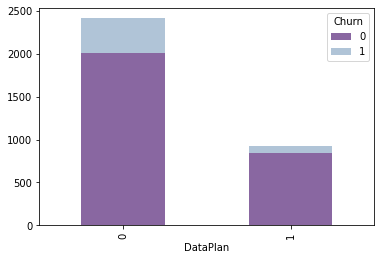

In [15]:
pd.crosstab(df['DataPlan'], df['Churn']).plot(kind = 'bar', stacked = True,color=colors)
plt.show()

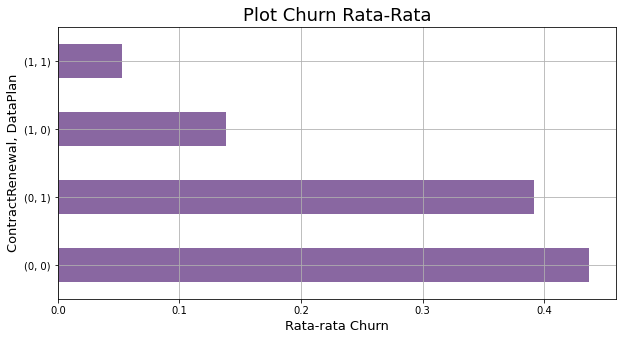

In [16]:
ax = plt.figure(figsize=(10,5))
df.groupby(['ContractRenewal',"DataPlan"])['Churn'].mean().plot(kind="barh",color=color1)
plt.title("Plot Churn Rata-Rata" , size=18)
plt.ylabel("ContractRenewal, DataPlan",size=13)
plt.xlabel("Rata-rata Churn",size=13)
plt.grid(True)
plt.show()

Atribut ContractRenewal dan DataPlan adalah dua atribut penting dalam churn pelanggan. Jika kedua atribut ini adalah "1", kemungkinan churn pelanggan rendah. **Dampak ContractRenewal lebih besar dari DataPlan**.

Meningkatkan DataUsage menurunkan kemungkinan churn customer dan menurunkan atribut lainnya menurunkan kemungkinan churn customer.

### Data Non-Biner

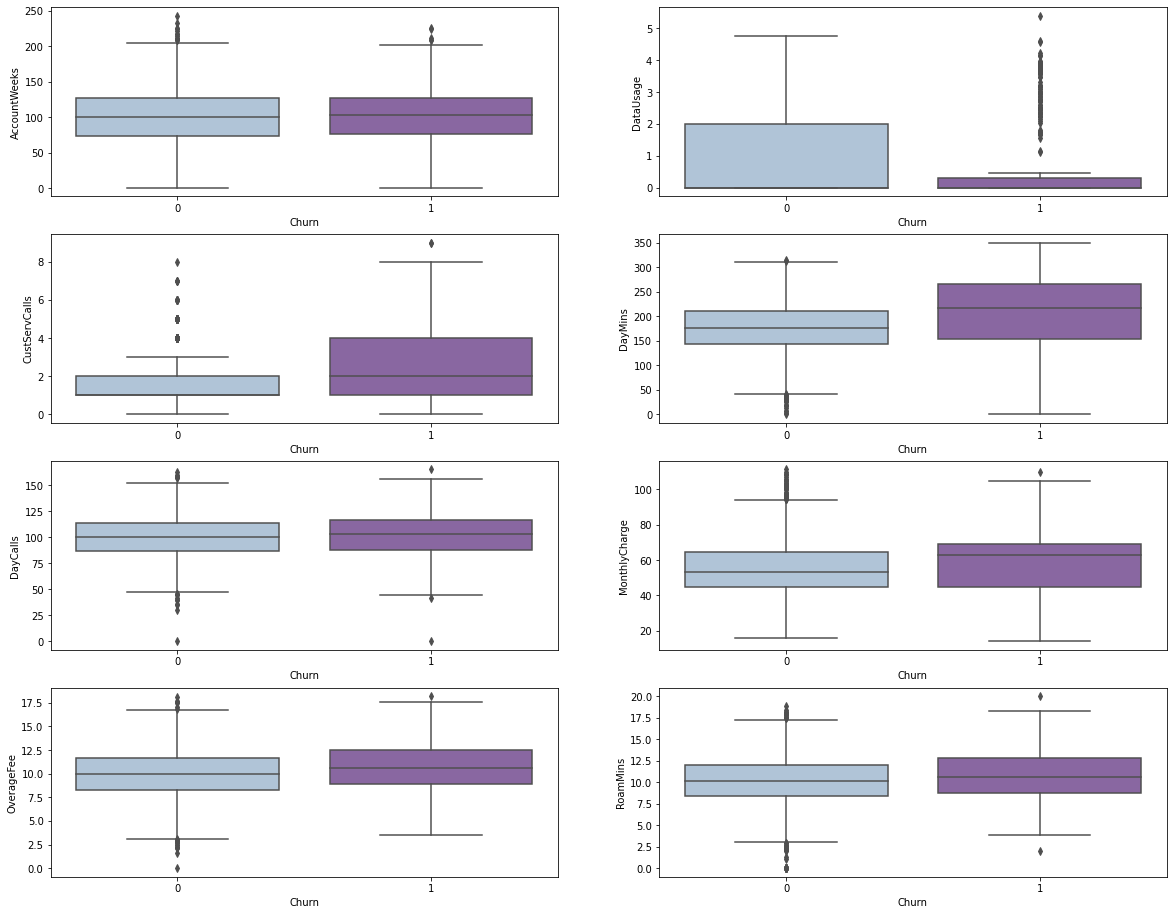

In [17]:
fig = plt.figure(figsize = (20,16))

nonbiner= df[['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
               'RoamMins']]
for i, j in enumerate(nonbiner):
    axes = fig.add_subplot(4, 2, i+1)
    sns.boxplot(x = 'Churn', y = j, data = df, ax = axes,palette="BuPu")

***Insight:***

DataUsage:
- Median dari grup churn maupun no churn bernilai 0. Ini mungkin terjadi karena hanya sekitar 27 % customer yang memiliki data plan.
- Dalam grup churn, rentang interquartile tidak sebesar dari grup yang no churn.
- Hal tersebut berarti data usage lebih menyebar untuk pelanggan yang kemudian tinggal di perusahaan (No churn).

CustServCalls:
- Customer yang churn rata-rata memiliki satu panggilan Customer Service daripada mereka yang tetap tinggal di perusahaan.

DayMins:
- Memiliki rata-rata menit harian yang lebih tinggi per bulan untuk customer yang churn.

MonthlyCharge:
- Customer yang churn memiliki rata-rata Monthly Charge yang lebihj tinggi daripada yang tinggal di perusahaan.

### Melihat Relationship

In [18]:
#Membagi dataframe menjadi 2
df_c1 = df.loc[df["Churn"]==1] # Customer yang churn
df_c0 = df.loc[df["Churn"]==0] # Customer bertahan

In [19]:
#dataplan

Text(0.5, 1.0, 'DataPlan dan MonthlyCharge Relationship')

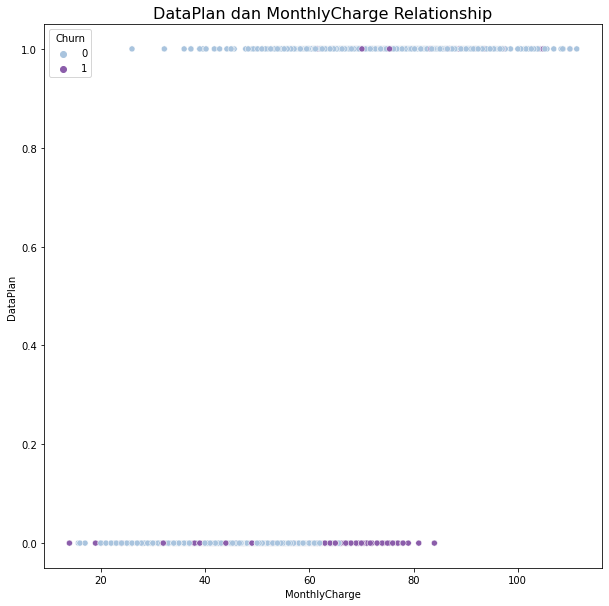

In [20]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x='MonthlyCharge', y = 'DataPlan',palette='BuPu',hue='Churn')
plt.title('DataPlan dan MonthlyCharge Relationship',fontsize=16)

Text(0.5, 1.0, 'No Churn')

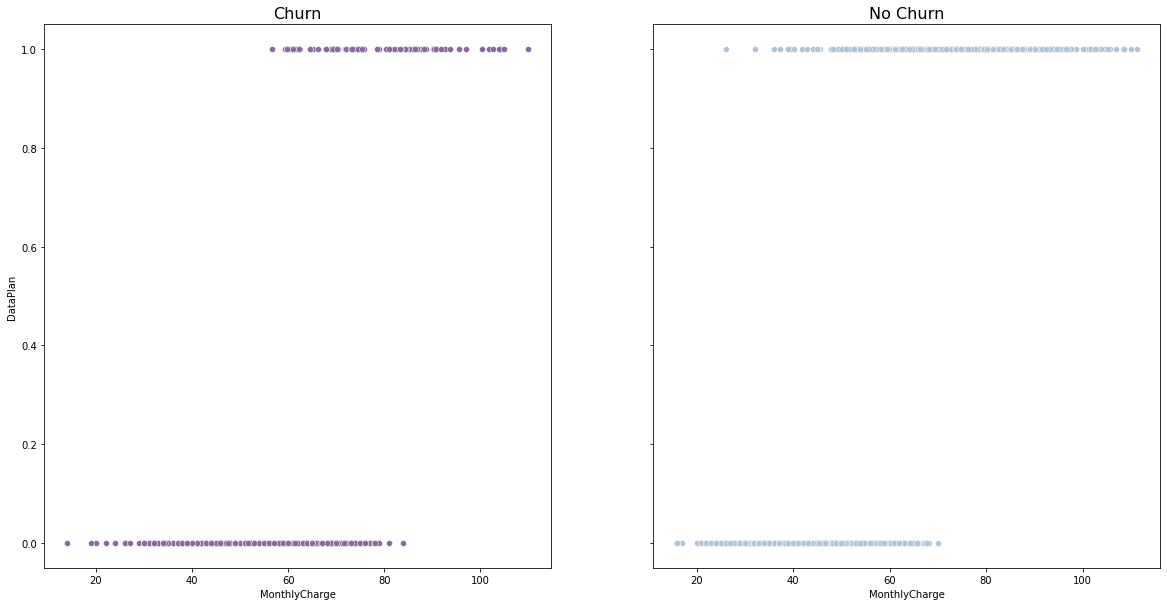

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(20,10))

#scatter
sns.scatterplot(data = df_c1, x='MonthlyCharge', y = 'DataPlan',ax=ax1,color=color1)
sns.scatterplot(data = df_c0, x='MonthlyCharge', y = 'DataPlan',ax=ax2,color=color2)

#Title
ax1.set_title('Churn', fontsize= 16)
ax2.set_title('No Churn',fontsize= 16)

###### DayMins dan MonthlyCharge

Text(0.5, 1.0, 'DayMins dan MonthlyCharge Relationship')

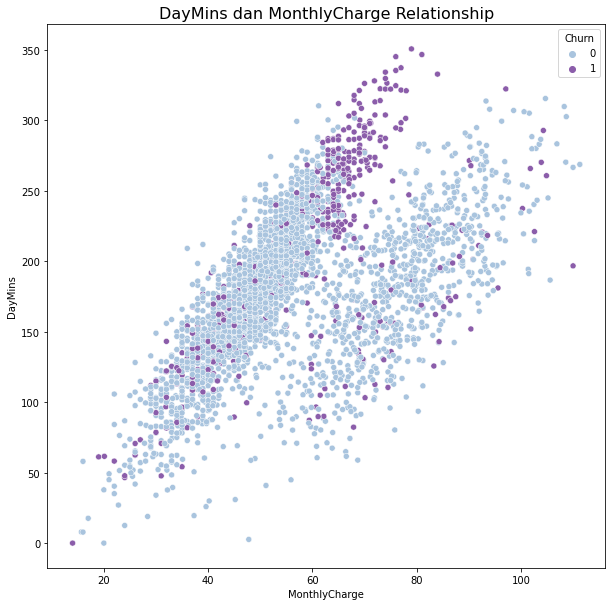

In [22]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x='MonthlyCharge', y = 'DayMins',palette='BuPu',hue='Churn')
plt.title('DayMins dan MonthlyCharge Relationship',fontsize=16)

Text(0.5, 1.0, 'No Churn')

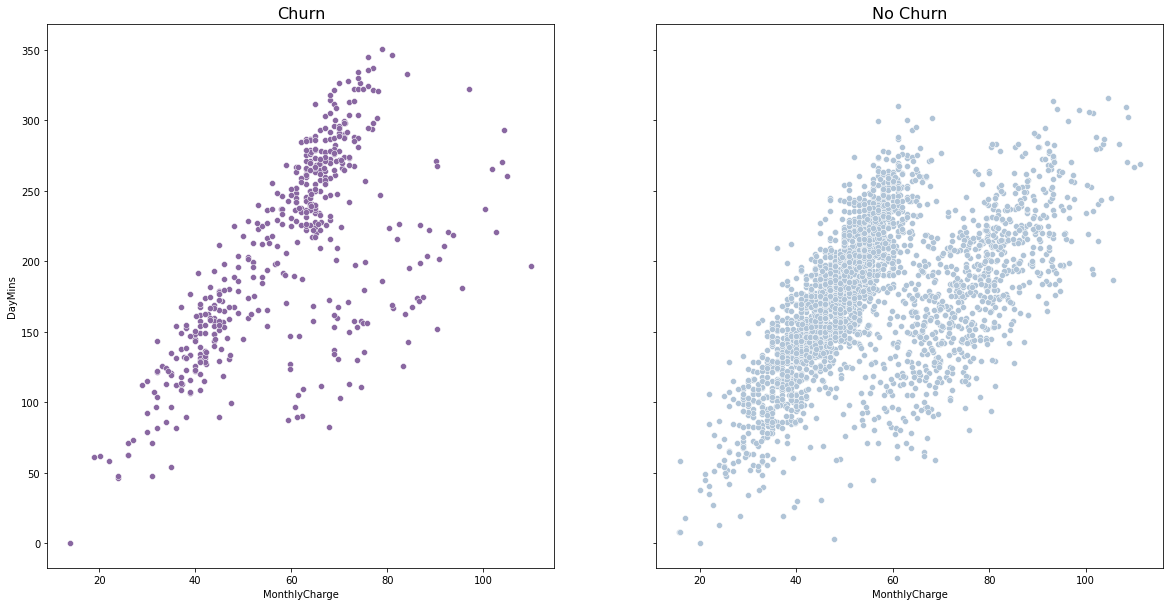

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(20,10))

#scatter
sns.scatterplot(data = df_c1, x='MonthlyCharge', y = 'DayMins',ax=ax1,color=color1)
sns.scatterplot(data = df_c0, x='MonthlyCharge', y = 'DayMins',ax=ax2,color=color2)

#Title
ax1.set_title('Churn', fontsize= 16)
ax2.set_title('No Churn',fontsize= 16)

###### DataUsage dan MonthlyCharge

Text(0.5, 1.0, 'DataUsage dan MonthlyCharge Relationship')

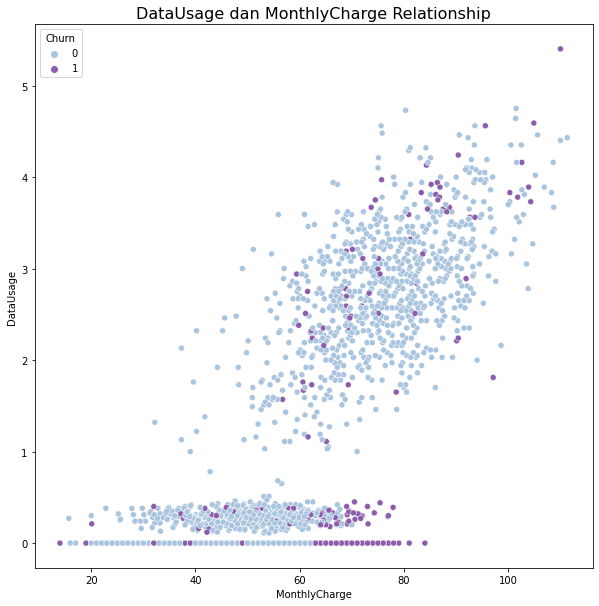

In [24]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x='MonthlyCharge', y = 'DataUsage',palette='BuPu',hue='Churn')
plt.title('DataUsage dan MonthlyCharge Relationship',fontsize=16)

Text(0.5, 1.0, 'No Churn')

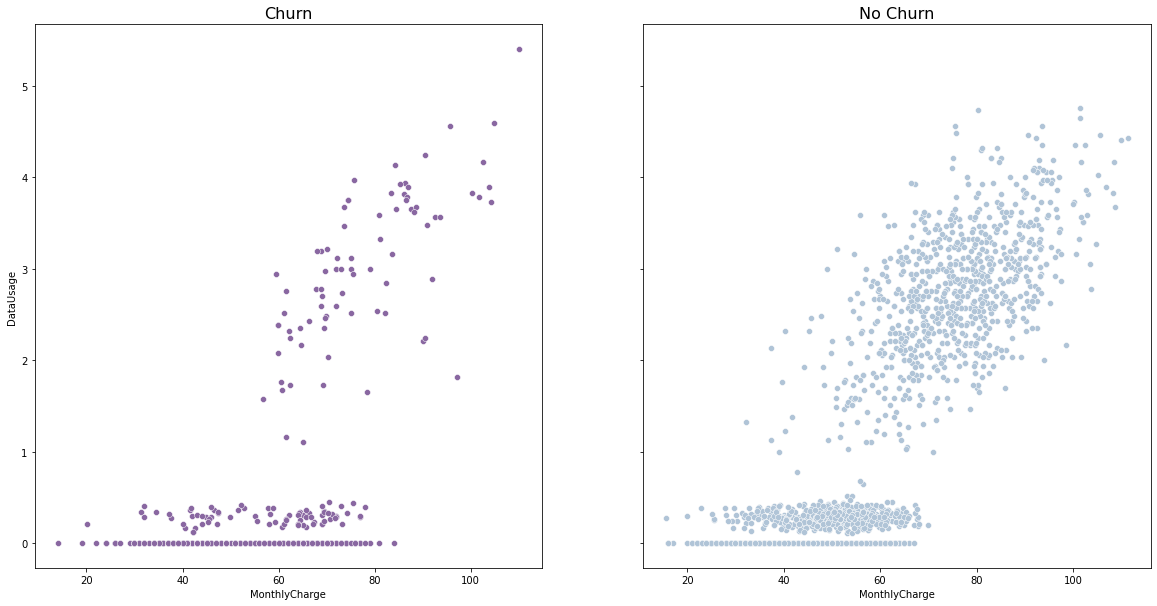

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(20,10))

#scatter
sns.scatterplot(data = df_c1, x='MonthlyCharge', y = 'DataUsage',ax=ax1,color=color1)
sns.scatterplot(data = df_c0, x='MonthlyCharge', y = 'DataUsage',ax=ax2,color=color2)

#Title
ax1.set_title('Churn', fontsize= 16)
ax2.set_title('No Churn',fontsize= 16)

Dari DataUsage, dapat dengan mudah dibagi menjadi dua segemen customer
- DataUsage 0-1 = Segment 1
- DataUsage >1 = Segment 2

### Segmentasi

In [26]:
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg1_c1 = seg1.loc[seg1["Churn"]==1] # Churn dari Segment1
seg1_c0 = seg1.loc[seg1["Churn"]==0] # Bertahan dari Segement1

seg2_c1 = seg2.loc[seg2["Churn"]==1] # Churn dari Segment2
seg2_c0 = seg2.loc[seg2["Churn"]==0] # Bertahan dari Segement2

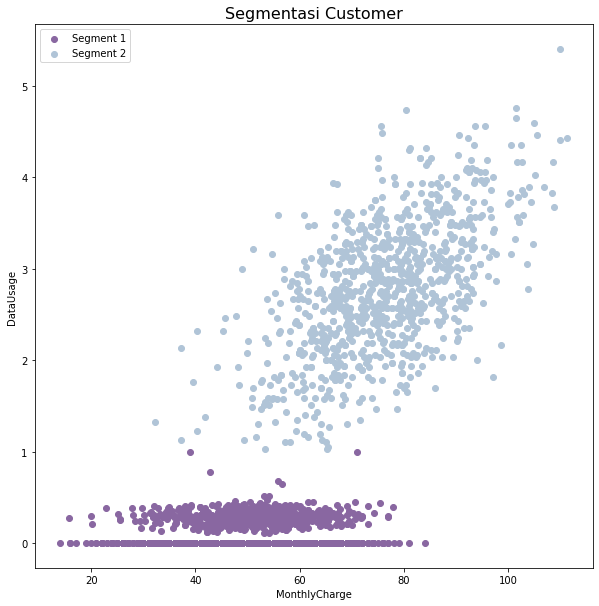

In [27]:
fig = plt.figure(figsize = (10,10))
plt.scatter(seg1['MonthlyCharge'], seg1['DataUsage'], color=color1, label='Segment 1')
plt.scatter(seg2['MonthlyCharge'], seg2['DataUsage'], color=color2, label='Segment 2')
plt.title('Segmentasi Customer',fontsize=16)
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

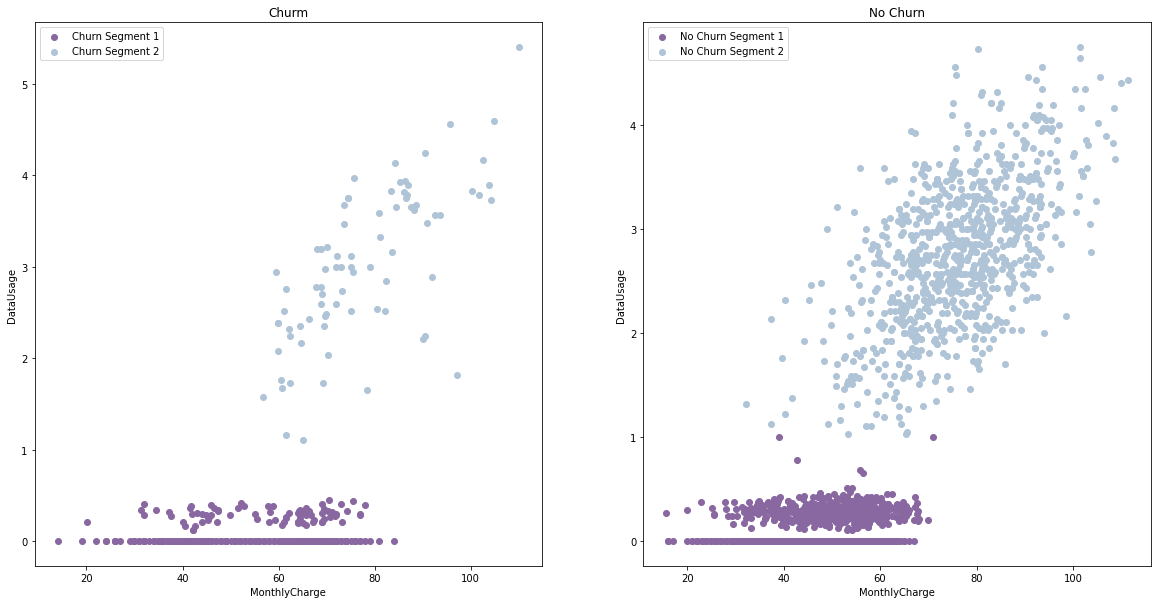

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.scatter(seg1_c1['MonthlyCharge'], seg1_c1['DataUsage'], label='Churn Segment 1',color=color1)
plt.scatter(seg2_c1['MonthlyCharge'], seg2_c1['DataUsage'], label='Churn Segment 2',color=color2)
plt.title('Churm')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(122)
plt.scatter(seg1_c0['MonthlyCharge'], seg1_c0['DataUsage'], label='No Churn Segment 1',color=color1)
plt.scatter(seg2_c0['MonthlyCharge'], seg2_c0['DataUsage'], label='No Churn Segment 2',color=color2)
plt.title('No Churn')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

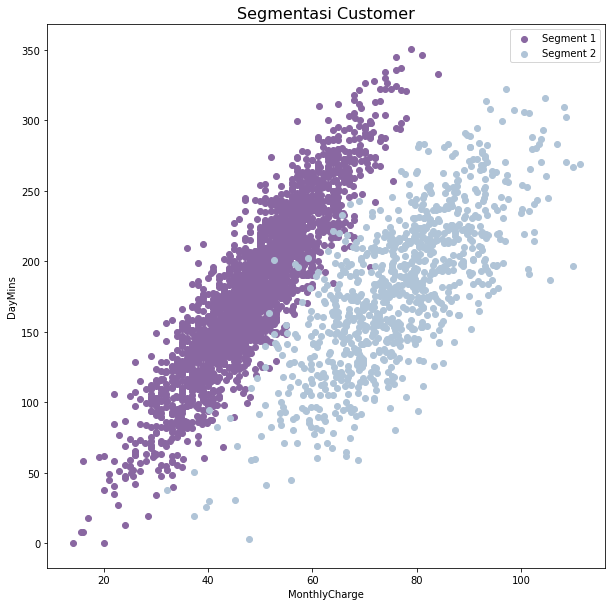

In [29]:
fig = plt.figure(figsize = (10,10))
plt.scatter(seg1['MonthlyCharge'], seg1['DayMins'], color=color1, label='Segment 1')
plt.scatter(seg2['MonthlyCharge'], seg2['DayMins'], color=color2, label='Segment 2')
plt.title('Segmentasi Customer',fontsize=16)
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

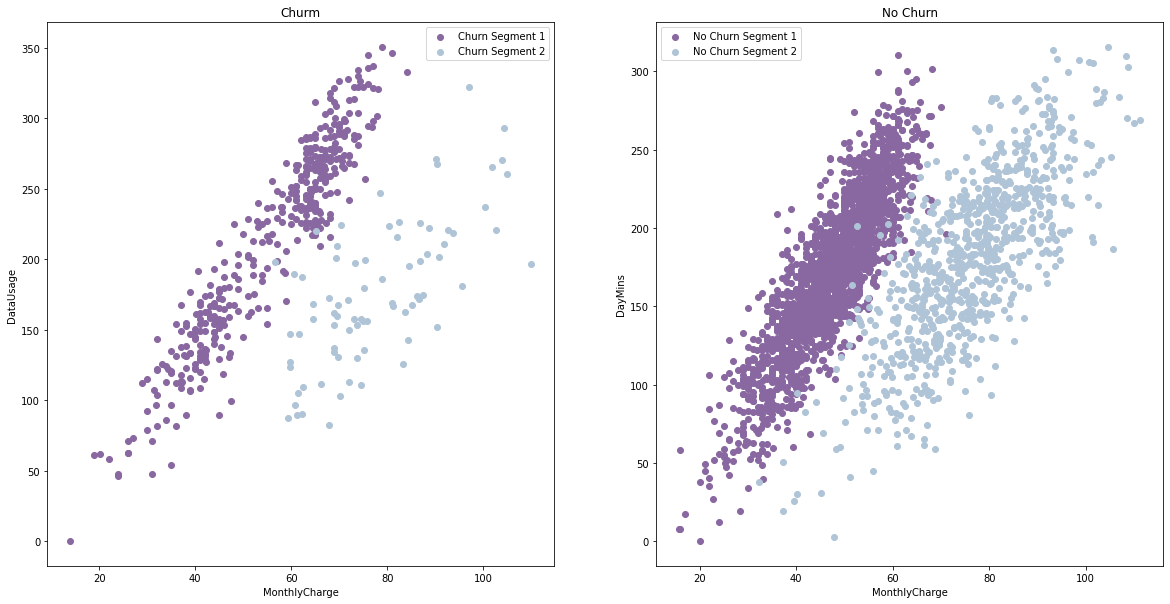

In [30]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.scatter(seg1_c1['MonthlyCharge'], seg1_c1['DayMins'], label='Churn Segment 1',color=color1)
plt.scatter(seg2_c1['MonthlyCharge'], seg2_c1['DayMins'], label='Churn Segment 2',color=color2)
plt.title('Churm')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(122)
plt.scatter(seg1_c0['MonthlyCharge'], seg1_c0['DayMins'], label='No Churn Segment 1',color=color1)
plt.scatter(seg2_c0['MonthlyCharge'], seg2_c0['DayMins'], label='No Churn Segment 2',color=color2)
plt.title('No Churn')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

***Segement 1***

In [31]:
seg1

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [32]:
#DataPlan

In [33]:
pd.crosstab(seg1['DataPlan'], seg1['Churn']).apply(lambda x: x*100/x.sum(), axis = 1)

Churn,0,1
DataPlan,,
0,83.284944,16.715056
1,100.000000,0.000000


In [34]:
(seg1["DataPlan"].value_counts(normalize=True) * 100)

0    99.628099
1     0.371901
Name: DataPlan, dtype: float64

In [35]:
# melihat customer yang memiliki DataPlan dalam seg1
seg1.loc[seg1["DataPlan"]==1]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
343,0,98,1,1,0.00,2,64.6,98,26.0,8.81,0.0
383,0,117,0,1,1.00,1,196.0,82,71.0,16.14,3.7
595,0,87,1,1,0.00,1,151.4,95,39.0,7.62,0.0
2906,0,87,1,1,0.00,1,165.8,122,45.0,9.35,0.0
3022,0,123,1,1,0.78,0,146.6,87,42.8,5.74,2.9
3212,0,144,1,1,1.00,0,105.0,86,39.0,6.09,3.7
3216,0,221,1,1,0.65,0,180.5,85,56.5,11.21,2.4
3234,0,75,1,1,0.68,1,200.6,96,55.8,8.21,2.5
3275,0,120,1,1,0.00,1,128.5,115,36.0,8.19,0.0


***Segement 2***

In [36]:
seg2

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2
16,0,85,1,1,3.73,1,196.4,139,95.3,14.05,13.8
...,...,...,...,...,...,...,...,...,...,...,...
3306,0,106,1,1,2.19,1,83.6,131,53.9,10.20,8.1
3315,0,149,1,1,1.76,0,148.5,106,52.6,5.73,6.5
3316,0,103,1,1,3.32,0,164.1,111,80.2,10.96,12.3
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9


In [37]:
#DataPlan

In [38]:
pd.crosstab(seg2['DataPlan'], seg2['Churn']).apply(lambda x: x*100/x.sum(), axis = 1)

Churn,0,1
DataPlan,,
1,91.237678,8.762322


In [39]:
(seg2["DataPlan"].value_counts(normalize=True) * 100)

1    100.0
Name: DataPlan, dtype: float64

In [40]:
# melihat customer yang memiliki DataPlan dalam seg2
seg2.loc[seg2["DataPlan"]==1]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2
16,0,85,1,1,3.73,1,196.4,139,95.3,14.05,13.8
...,...,...,...,...,...,...,...,...,...,...,...
3306,0,106,1,1,2.19,1,83.6,131,53.9,10.20,8.1
3315,0,149,1,1,1.76,0,148.5,106,52.6,5.73,6.5
3316,0,103,1,1,3.32,0,164.1,111,80.2,10.96,12.3
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9


***Segment 1 dan Segment 2 DayMins***

Text(0.5, 1.0, 'DayMins')

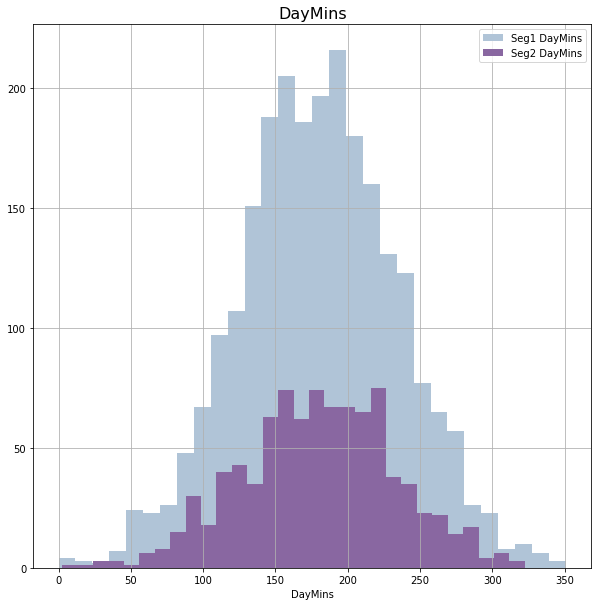

In [41]:
plt.figure(figsize=(10,10))
seg1['DayMins'].hist(bins=30, label='Seg1 DayMins',color=color2)
seg2['DayMins'].hist(bins=30, label='Seg2 DayMins',color=color1)
plt.legend()
plt.xlabel("DayMins")
plt.title("DayMins",fontsize=16)

Text(0.5, 1.0, 'DayMins Segment 2')

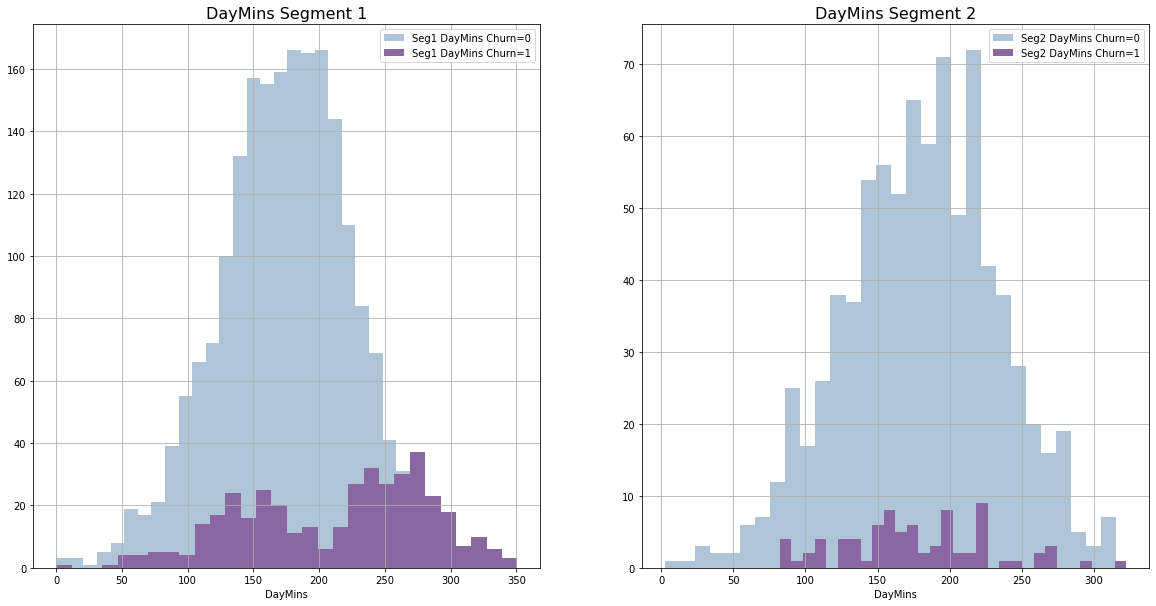

In [42]:
plt.figure(figsize=(20,10))

plt.subplot(121)
seg1_c0["DayMins"].hist(bins=30, label='Seg1 DayMins Churn=0',color=color2)
seg1_c1["DayMins"].hist(bins=30, label='Seg1 DayMins Churn=1',color=color1)
plt.legend()
plt.xlabel("DayMins")
plt.title("DayMins Segment 1",fontsize=16)

plt.subplot(122)
seg2_c0["DayMins"].hist(bins=30,label='Seg2 DayMins Churn=0',color=color2)
seg2_c1["DayMins"].hist(bins=30,label='Seg2 DayMins Churn=1',color=color1)
plt.legend()
plt.xlabel("DayMins")
plt.title("DayMins Segment 2",fontsize=16)

***Segment 1 dan Segment 2 DataUsage***

Text(0.5, 1.0, 'DataUsage')

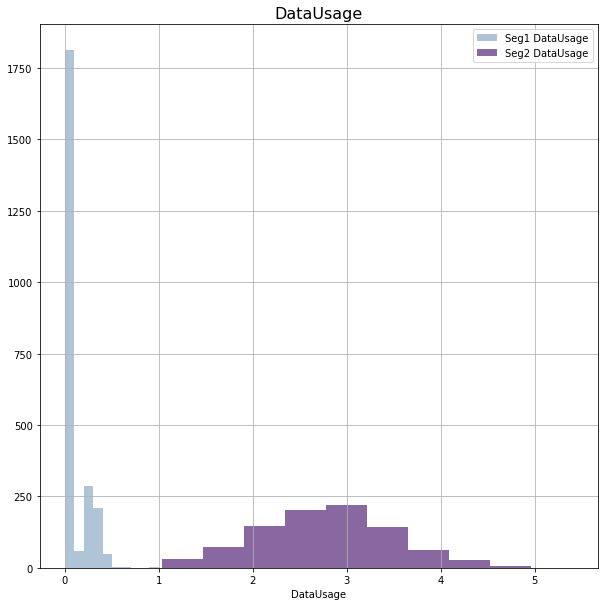

In [43]:
plt.figure(figsize=(10,10))
seg1['DataUsage'].hist(label='Seg1 DataUsage',color=color2)
seg2['DataUsage'].hist(label='Seg2 DataUsage',color=color1)
plt.legend()
plt.xlabel("DataUsage")
plt.title("DataUsage",fontsize=16)

Text(0.5, 1.0, 'DataUsage Segment 2')

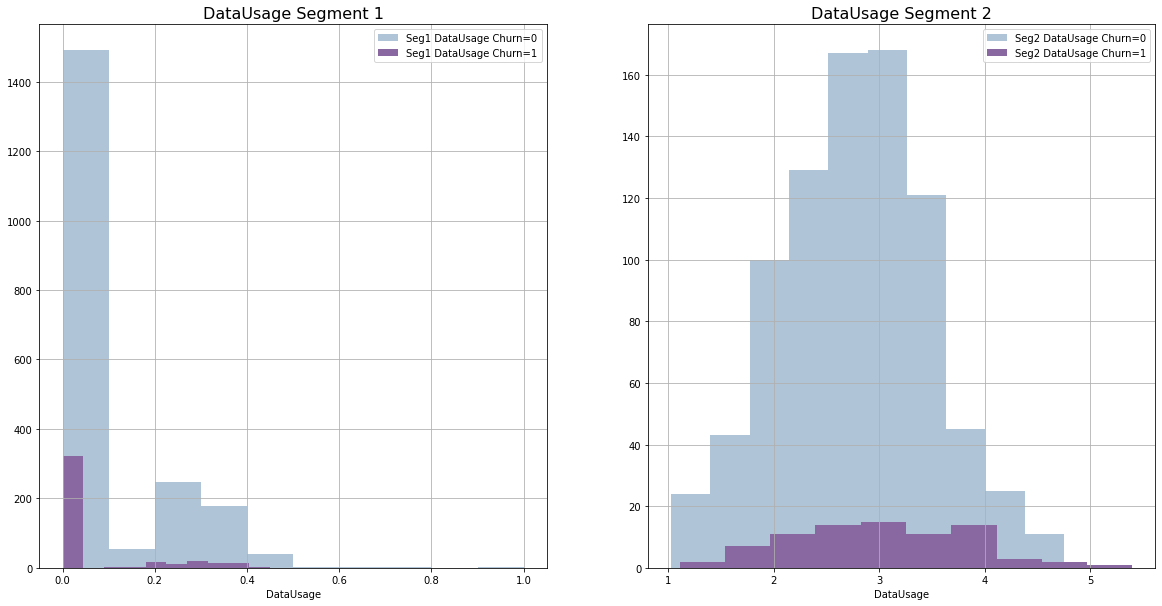

In [44]:
plt.figure(figsize=(20,10))

plt.subplot(121)
seg1_c0["DataUsage"].hist(label='Seg1 DataUsage Churn=0',color=color2)
seg1_c1["DataUsage"].hist(label='Seg1 DataUsage Churn=1',color=color1)
plt.legend()
plt.xlabel("DataUsage")
plt.title("DataUsage Segment 1",fontsize=16)

plt.subplot(122)
seg2_c0["DataUsage"].hist(label='Seg2 DataUsage Churn=0',color=color2)
seg2_c1["DataUsage"].hist(label='Seg2 DataUsage Churn=1',color=color1)
plt.legend()
plt.xlabel("DataUsage")
plt.title("DataUsage Segment 2",fontsize=16)

***Segment 1 dan Segment 2 DayCalls***

Text(0.5, 1.0, 'DayCalls')

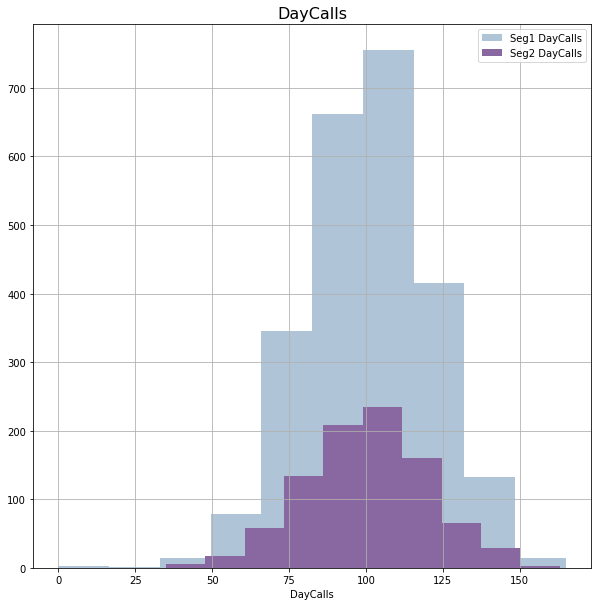

In [45]:
plt.figure(figsize=(10,10))
seg1['DayCalls'].hist(label='Seg1 DayCalls',color=color2)
seg2['DayCalls'].hist(label='Seg2 DayCalls',color=color1)
plt.legend()
plt.xlabel("DayCalls")
plt.title("DayCalls",fontsize=16)

Text(0.5, 1.0, 'DayCalls Segment 2')

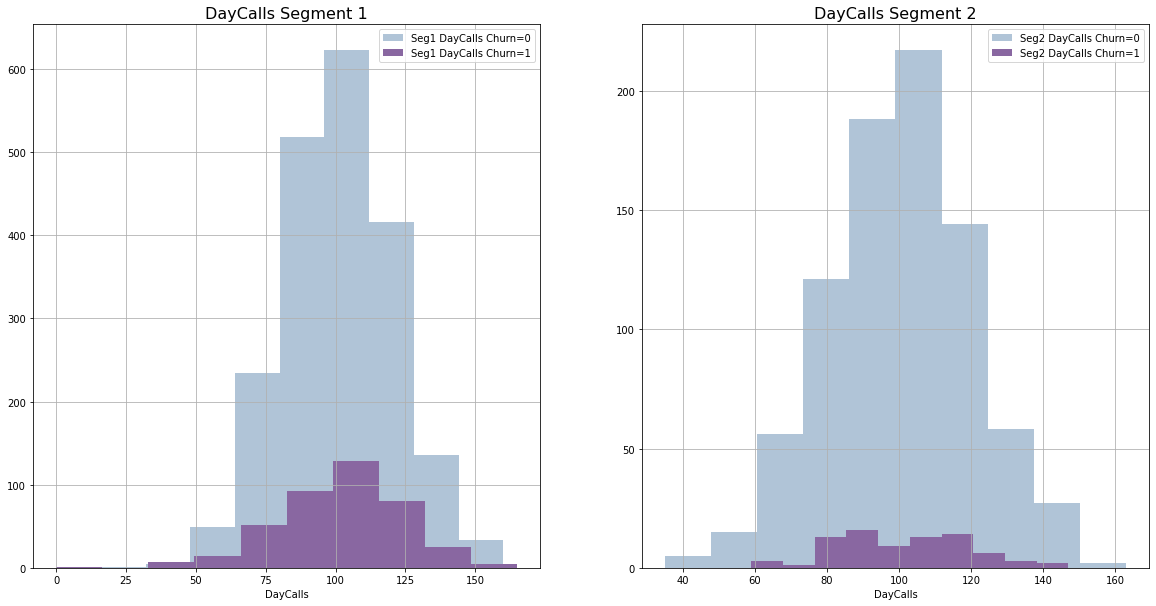

In [46]:
plt.figure(figsize=(20,10))

plt.subplot(121)
seg1_c0["DayCalls"].hist(label='Seg1 DayCalls Churn=0',color=color2)
seg1_c1["DayCalls"].hist(label='Seg1 DayCalls Churn=1',color=color1)
plt.legend()
plt.xlabel("DayCalls")
plt.title("DayCalls Segment 1",fontsize=16)

plt.subplot(122)
seg2_c0["DayCalls"].hist(label='Seg2 DayCalls Churn=0',color=color2)
seg2_c1["DayCalls"].hist(label='Seg2 DayCalls Churn=1',color=color1)
plt.legend()
plt.xlabel("DayCalls")
plt.title("DayCalls Segment 2",fontsize=16)

***Segment 1 dan Segment 2 MonthlyCharge***

Text(0.5, 1.0, 'MonthlyCharge')

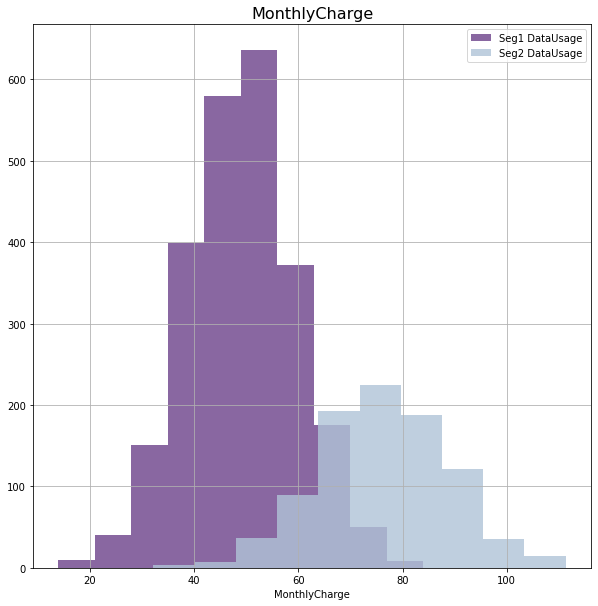

In [47]:
plt.figure(figsize=(10,10))
seg1['MonthlyCharge'].hist(label='Seg1 DataUsage',color=color1)
seg2['MonthlyCharge'].hist(alpha=0.8,label='Seg2 DataUsage',color=color2)
plt.legend()
plt.xlabel("MonthlyCharge")
plt.title("MonthlyCharge",fontsize=16)

Text(0.5, 1.0, 'MonthlyCharge pada Segment 1')

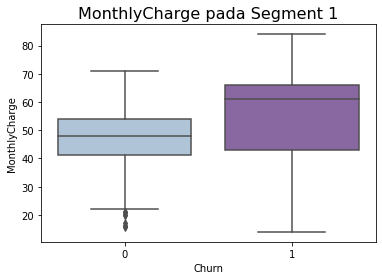

In [48]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg1,palette='BuPu')
plt.title('MonthlyCharge pada Segment 1',fontsize=16)

Text(0.5, 1.0, 'MonthlyCharge pada Segment 2')

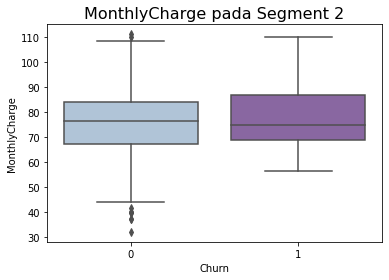

In [49]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2,palette='BuPu')
plt.title('MonthlyCharge pada Segment 2',fontsize=16)

***Segment 1 dan Segment 2 CustServCalls***

Text(0.5, 1.0, 'CustServiceCalls')

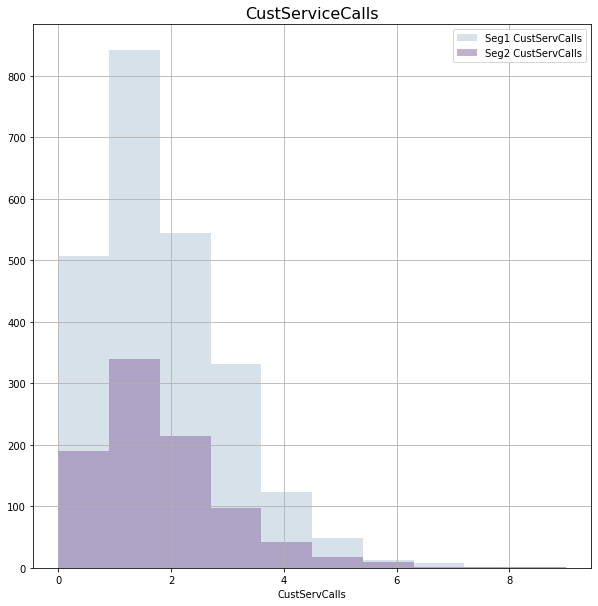

In [50]:
plt.figure(figsize=(10,10))

seg1['CustServCalls'].hist(alpha=0.5,label='Seg1 CustServCalls',color=color2)
seg2['CustServCalls'].hist(alpha=0.5,label='Seg2 CustServCalls',color=color1)
plt.legend()
plt.xlabel("CustServCalls")
plt.title("CustServiceCalls",fontsize=16)

Text(0.5, 1.0, 'CustServiceCalls Segment 2')

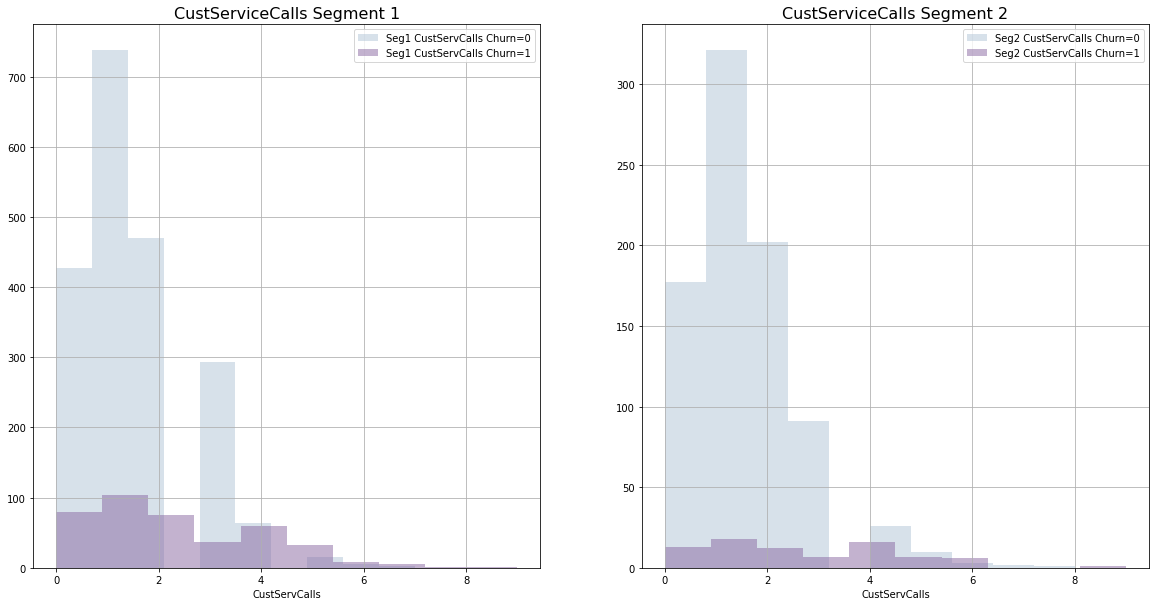

In [51]:
plt.figure(figsize=(20,10))

plt.subplot(121)
seg1_c0["CustServCalls"].hist(alpha=0.5,label='Seg1 CustServCalls Churn=0',color=color2)
seg1_c1["CustServCalls"].hist(alpha=0.5,label='Seg1 CustServCalls Churn=1',color=color1)
plt.legend()
plt.xlabel("CustServCalls")
plt.title("CustServiceCalls Segment 1",fontsize=16)

plt.subplot(122)
seg2_c0["CustServCalls"].hist(alpha=0.5,label='Seg2 CustServCalls Churn=0',color=color2)
seg2_c1["CustServCalls"].hist(alpha=0.5,label='Seg2 CustServCalls Churn=1',color=color1)
plt.legend()
plt.xlabel("CustServCalls")
plt.title("CustServiceCalls Segment 2",fontsize=16)

***Segment 1 dan Segment 2 ContractRenewal***

Text(0.5, 1.0, 'ContractRenewal Segment 2')

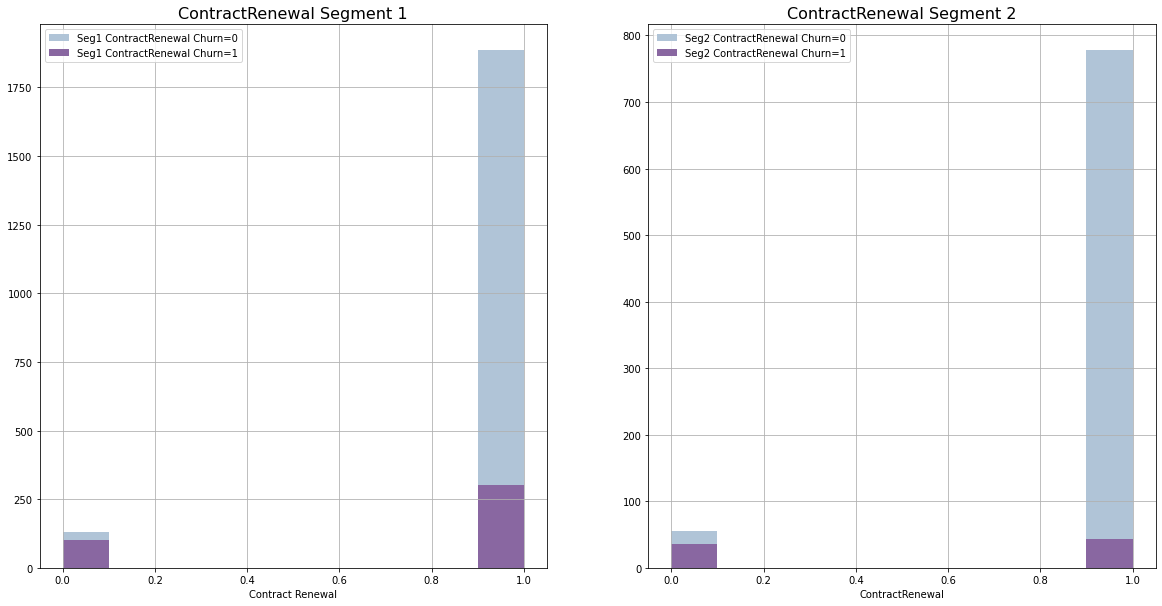

In [52]:
plt.figure(figsize=(20,10))

plt.subplot(121)
seg1_c0["ContractRenewal"].hist(label='Seg1 ContractRenewal Churn=0',color=color2)
seg1_c1["ContractRenewal"].hist(label='Seg1 ContractRenewal Churn=1',color=color1)
plt.legend()
plt.xlabel("Contract Renewal")
plt.title("ContractRenewal Segment 1",fontsize=16)

plt.subplot(122)
seg2_c0["ContractRenewal"].hist(label='Seg2 ContractRenewal Churn=0',color=color2)
seg2_c1["ContractRenewal"].hist(label='Seg2 ContractRenewal Churn=1',color=color1)
plt.legend()
plt.xlabel("ContractRenewal")
plt.title("ContractRenewal Segment 2",fontsize=16)

**Cara untuk Mempertahankan Customer**
- Semakin banyak Customer Service Call, maka semakin rentan untuk Churn
- Optimalkan harga waktu panggilan untuk customer segmen 1
- Perkenalkan paket data kepada customer yang menggunakan data tanpa paket data secepatnya.
-  Optimalkan harga paket data untuk customer segmen 2

## Classification

### Upper Sampling

*****Persiapan*****

In [53]:
#Imbalance Problem
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [54]:
## Check the proportion of 0 and 1 in Churn label
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

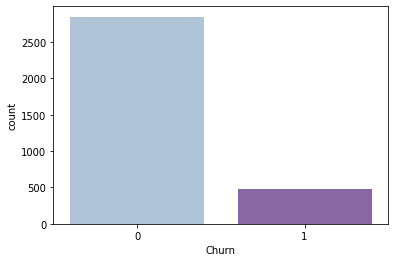

In [55]:
sns.countplot(df["Churn"],palette="BuPu")

In [56]:
#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']==0)] 
df_minority = df[(df['Churn']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=2850, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [57]:
df_upsampled["Churn"].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

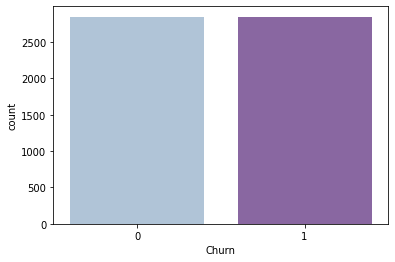

In [58]:
sns.countplot(df_upsampled["Churn"],palette="BuPu")

In [59]:
#One Hot Encoding
df = pd.get_dummies(df)
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


 One Hot Encoding tidak ada pengaruh karena sebelumnya dataframe tidak mempunyai tipe data string

In [61]:
# Train Test Split

# defining feature matrix(X) and response vector(y)
X = df_upsampled.loc[:, df.columns != 'Churn']
y = df_upsampled["Churn"]

In [62]:
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

*****Logistic Regression*****

In [63]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

C:\Users\ASUS\.conda\envs\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*****Decision Tree*****

In [64]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [65]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_5 <= 236.15
|   |--- feature_4 <= 3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 13.10
|   |   |   |   |--- feature_3 <= 3.24
|   |   |   |   |   |--- feature_6 <= 134.50
|   |   |   |   |   |   |--- feature_5 <= 233.80
|   |   |   |   |   |   |   |--- feature_0 <= 35.00
|   |   |   |   |   |   |   |   |--- feature_6 <= 61.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  61.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  35.00
|   |   |   |   |   |   |   |   |--- feature_9 <= 10.05
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 2.13
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 60.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  60.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- feature_3 >  

*****Random Forest*****

In [66]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

*****Hyperparameter Tuning*****

In [67]:
rf2 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [68]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [69]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf2,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [70]:
grid_search.best_score_

0.9263157894736842

In [71]:
rf2_best = grid_search.best_estimator_
rf2_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

**Hyperparameter Tuning** menentukan **grid best score yaitu 92%** dengan max_depth terbaik yaitu 20, min sample leaf nya yaitu 5, n jobs yaitu -1, dan random state 42

*****Evaluation*****

In [72]:
y_lr = lr.predict(X_test) #Logistic Regression
y_dtree = dtree.predict(X_test) #Decision Tree
y_rf1 = classifier_rf.predict(X_test) #Random Forest sebelum Tuning
y_rf2 = rf2_best.predict(X_test) #Random Forest setelah Tuning

In [73]:
print("Logistic Regression \t\t :",accuracy_score(y_test, y_lr))
print("Decision Tree \t\t\t :",accuracy_score(y_test, y_dtree))
print("Random Forest sebelum tuning \t :",accuracy_score(y_test, y_rf1))
print("Random Forest setelah tuning \t :",accuracy_score(y_test, y_rf2))

Logistic Regression 		 : 0.7478070175438597
Decision Tree 			 : 0.9526315789473684
Random Forest sebelum tuning 	 : 0.8802631578947369
Random Forest setelah tuning 	 : 0.9328947368421052


dari sisi akurasi yang paling bagus yaitu **decision tree**

In [74]:
print("Logistic Regression \t\t :",precision_score(y_test, y_lr, average='macro'))
print("Decision Tree \t\t\t :",precision_score(y_test, y_dtree, average='macro'))
print("Random Forest sebelum tuning \t :",precision_score(y_test, y_rf1, average='macro'))
print("Random Forest setelah tuning \t :",precision_score(y_test, y_rf2, average='macro'))

Logistic Regression 		 : 0.7479064039408867
Decision Tree 			 : 0.9545122587376109
Random Forest sebelum tuning 	 : 0.8804302310186312
Random Forest setelah tuning 	 : 0.9331237065142406


dari sisi presisi yang paling bagus yaitu **decision tree**

In [75]:
print("Logistic Regression \t\t :",recall_score(y_test, y_lr, average='macro'))
print("Decision Tree \t\t\t :",recall_score(y_test, y_dtree, average='macro'))
print("Random Forest sebelum tuning \t :",recall_score(y_test, y_rf1, average='macro'))
print("Random Forest setelah tuning \t :",recall_score(y_test, y_rf2, average='macro'))

Logistic Regression 		 : 0.7478318178565411
Decision Tree 			 : 0.952548147840359
Random Forest sebelum tuning 	 : 0.8802911839186329
Random Forest setelah tuning 	 : 0.9328654168888519


dari sisi recall yang paling bagus yaitu **decision tree**

In [76]:
print("Logistic Regression :\n",confusion_matrix(y_test, y_lr))
print("Decision Tree :\n",confusion_matrix(y_test, y_dtree))
print("Random Forest sebelum tuning :\n",confusion_matrix(y_test, y_rf1))
print("Random Forest setelah tuning :\n",confusion_matrix(y_test, y_rf2))

Logistic Regression :
 [[861 276]
 [299 844]]
Decision Tree :
 [[1047   90]
 [  18 1125]]
Random Forest sebelum tuning :
 [[1013  124]
 [ 149  994]]
Random Forest setelah tuning :
 [[1048   89]
 [  64 1079]]


In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print("Logistic Regression \t\t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print("Decision Tree \t\t\t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf1, pos_label=1) # pos_label: positive label
print("Random Forest sebelum tuning \t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf2, pos_label=1) # pos_label: positive label
print("Random Forest setelah tuning \t :",auc(fpr, tpr))

Logistic Regression 		 : 0.7478318178565411
Decision Tree 			 : 0.952548147840359
Random Forest sebelum tuning 	 : 0.8802911839186328
Random Forest setelah tuning 	 : 0.9328654168888519


In [78]:
print("Logistic Regression",classification_report(y_test, y_lr))
print("Decision Tree",classification_report(y_test, y_dtree))
print("Random Forest sebelum tuning",classification_report(y_test, y_rf1))
print("Random Forest setelah tuning",classification_report(y_test, y_rf2))

Logistic Regression               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1137
           1       0.75      0.74      0.75      1143

    accuracy                           0.75      2280
   macro avg       0.75      0.75      0.75      2280
weighted avg       0.75      0.75      0.75      2280

Decision Tree               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1137
           1       0.93      0.98      0.95      1143

    accuracy                           0.95      2280
   macro avg       0.95      0.95      0.95      2280
weighted avg       0.95      0.95      0.95      2280

Random Forest sebelum tuning               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1137
           1       0.89      0.87      0.88      1143

    accuracy                           0.88      2280
   macro avg       0.88      0.88      0.88      2280
weighted av

**Decision Tree** adalah model paling bagus 

### Under Sampling

*****Persiapan*****

In [79]:
#Imbalance Problem
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [80]:
## Check the proportion of 0 and 1 in Churn label
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

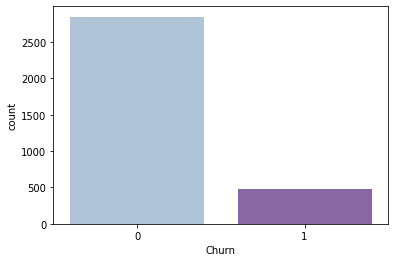

In [81]:
sns.countplot(df["Churn"],palette="BuPu")

In [82]:
#create two different dataframe of majority and minority class 
df_majority1 = df[(df['Churn']==0)] 
df_minority1 = df[(df['Churn']==1)] 
# upsample minority class
df_majority_upsampled1 = resample(df_majority1, 
                                 replace=True,    # sample with replacement
                                 n_samples=483, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled1 = pd.concat([df_majority_upsampled1, df_minority1])

In [83]:
df_upsampled1["Churn"].value_counts()

0    483
1    483
Name: Churn, dtype: int64

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

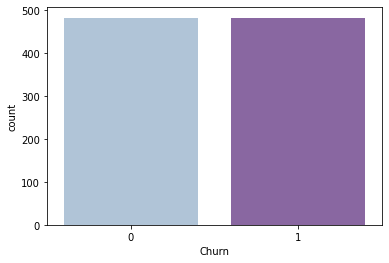

In [84]:
sns.countplot(df_upsampled1["Churn"],palette="BuPu")

In [85]:
# Train Test Split

# defining feature matrix(X) and response vector(y)
X1 = df_upsampled1.loc[:, df.columns != 'Churn']
y1 = df_upsampled1["Churn"]

In [86]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4,
                                                    random_state=1)

*****Logistic Regression*****

In [87]:
lr2 = LogisticRegression()
lr2 = lr2.fit(X1_train, y1_train)

C:\Users\ASUS\.conda\envs\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*****Decision Tree*****

In [88]:
dtree2 = tree.DecisionTreeClassifier()
dtree2 = dtree2.fit(X1_train, y1_train)

In [89]:
text_representation = tree.export_text(dtree2)
print(text_representation)

|--- feature_5 <= 234.15
|   |--- feature_4 <= 3.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 11.35
|   |   |   |   |--- feature_5 <= 138.60
|   |   |   |   |   |--- feature_5 <= 76.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  76.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  138.60
|   |   |   |   |   |--- feature_6 <= 83.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  83.50
|   |   |   |   |   |   |--- feature_8 <= 7.99
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_8 >  7.99
|   |   |   |   |   |   |   |--- feature_5 <= 153.75
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  153.75
|   |   |   |   |   |   |   |   |--- feature_5 <= 179.95
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  179.95
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 1.5

*****Random Forest*****

In [90]:
classifier_rf3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf3.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

*****Hyperparameter Tuning*****

In [91]:
rf4 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [92]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [93]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf4,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X1_train, y1_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [94]:
grid_search.best_score_

0.8531728927203065

In [95]:
rf_best4 = grid_search.best_estimator_
rf_best4.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

**Hyperparameter Tuning** menentukan **grid best score yaitu 85%** dengan max_depth terbaik yaitu 10, min sample leaf nya yaitu 5, n jobs yaitu -1, dan random state 42

*****Evaluation*****

In [96]:
y_lr2 = lr2.predict(X1_test) #Logistic Regression
y_dtree2 = dtree2.predict(X1_test) #Decision Tree
y_rf3 = classifier_rf3.predict(X1_test) #Random Forest sebelum tuning
y_rf4 = rf_best4.predict(X1_test) #Random Forest setelah tuning

In [97]:
print("Logistic Regression \t\t :",accuracy_score(y1_test, y_lr2))
print("Decision Tree \t\t\t :",accuracy_score(y1_test, y_dtree2))
print("Random Forest sebelum tuning \t :",accuracy_score(y1_test, y_rf3))
print("Random Forest setelah tuning \t :",accuracy_score(y1_test, y_rf4))

Logistic Regression 		 : 0.7571059431524548
Decision Tree 			 : 0.7364341085271318
Random Forest sebelum tuning 	 : 0.8527131782945736
Random Forest setelah tuning 	 : 0.8294573643410853


dari sisi akurasi yang paling bagus yaitu **random forest sebelum dilakukan Hyperparameter Tuning**

In [98]:
print("Logistic Regression \t\t :",precision_score(y1_test, y_lr2, average='macro'))
print("Decision Tree \t\t\t :",precision_score(y1_test, y_dtree2, average='macro'))
print("Random Forest sebelum tuning \t :",precision_score(y1_test, y_rf3, average='macro'))
print("Random Forest setelah tuning \t :",precision_score(y1_test, y_rf4, average='macro'))

Logistic Regression 		 : 0.7580710141813494
Decision Tree 			 : 0.7367807778849245
Random Forest sebelum tuning 	 : 0.8527322258426366
Random Forest setelah tuning 	 : 0.8294288919756384


dari sisi presisi yang paling bagus yaitu **random forest sebelum dilakukan Hyperparameter Tuning**

In [99]:
print("Logistic Regression \t\t :",recall_score(y1_test, y_lr2, average='macro'))
print("Decision Tree \t\t\t :",recall_score(y1_test, y_dtree2, average='macro'))
print("Random Forest sebelum tuning \t :",recall_score(y1_test, y_rf3, average='macro'))
print("Random Forest setelah tuning \t :",recall_score(y1_test, y_rf4, average='macro'))

Logistic Regression 		 : 0.7566647077679239
Decision Tree 			 : 0.7361229832247035
Random Forest sebelum tuning 	 : 0.8527887594828507
Random Forest setelah tuning 	 : 0.8294288919756384


dari sisi recall yang paling bagus yaitu **random forest sebelum dilakukan Hyperparameter Tuning**

In [100]:
print("Logistic Regression :\n",confusion_matrix(y1_test, y_lr2))
print("Decision Tree :\n",confusion_matrix(y1_test, y_dtree2))
print("Random Forest sebelum tuning : \n",confusion_matrix(y1_test, y_rf3))
print("Random Forest setelah tuning :\n",confusion_matrix(y1_test, y_rf4))

Logistic Regression :
 [[138  53]
 [ 41 155]]
Decision Tree :
 [[136  55]
 [ 47 149]]
Random Forest sebelum tuning : 
 [[164  27]
 [ 30 166]]
Random Forest setelah tuning :
 [[158  33]
 [ 33 163]]


In [101]:
fpr, tpr, thresholds = roc_curve(y1_test, y_lr2, pos_label=1) # pos_label: positive label
print("Logistic Regression \t\t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y1_test, y_dtree2, pos_label=1) # pos_label: positive label
print("Decision Tree \t\t\t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y1_test, y_rf3, pos_label=1) # pos_label: positive label
print("Random Forest sebelum tuning \t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y1_test, y_rf4, pos_label=1) # pos_label: positive label
print("Random Forest setelah tuning \t :",auc(fpr, tpr))

Logistic Regression 		 : 0.7566647077679239
Decision Tree 			 : 0.7361229832247034
Random Forest sebelum tuning 	 : 0.8527887594828508
Random Forest setelah tuning 	 : 0.8294288919756384


In [102]:
print("Logistic Regression",classification_report(y1_test, y_lr2))
print("Decision Tree",classification_report(y1_test, y_dtree2))
print("Random Forest sebelum tuning",classification_report(y1_test, y_rf3))
print("Random Forest setelah tuning",classification_report(y1_test, y_rf4))

Logistic Regression               precision    recall  f1-score   support

           0       0.77      0.72      0.75       191
           1       0.75      0.79      0.77       196

    accuracy                           0.76       387
   macro avg       0.76      0.76      0.76       387
weighted avg       0.76      0.76      0.76       387

Decision Tree               precision    recall  f1-score   support

           0       0.74      0.71      0.73       191
           1       0.73      0.76      0.74       196

    accuracy                           0.74       387
   macro avg       0.74      0.74      0.74       387
weighted avg       0.74      0.74      0.74       387

Random Forest sebelum tuning               precision    recall  f1-score   support

           0       0.85      0.86      0.85       191
           1       0.86      0.85      0.85       196

    accuracy                           0.85       387
   macro avg       0.85      0.85      0.85       387
weighted av

**Random Forest sebelum dilakukan Hyperparameter Tuning** adalah model paling bagus 

### Dengan df yang tidak di up dan under sampling

In [103]:
# Train Test Split

# defining feature matrix(X) and response vector(y)
X2 = df.loc[:, df.columns != 'Churn']
y2 = df["Churn"]

In [104]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4,
                                                    random_state=1)

*****Logistic Regression*****

In [105]:
lr3 = LogisticRegression()
lr3 = lr3.fit(X2_train, y2_train)

C:\Users\ASUS\.conda\envs\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*****Decision Tree*****

In [106]:
dtree3 = tree.DecisionTreeClassifier()
dtree3 = dtree3.fit(X2_train, y2_train)

In [107]:
text_representation = tree.export_text(dtree3)
print(text_representation)

|--- feature_4 <= 3.50
|   |--- feature_5 <= 247.45
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 12.85
|   |   |   |   |--- feature_5 <= 223.45
|   |   |   |   |   |--- feature_6 <= 57.50
|   |   |   |   |   |   |--- feature_4 <= 2.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  2.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  57.50
|   |   |   |   |   |   |--- feature_9 <= 5.65
|   |   |   |   |   |   |   |--- feature_9 <= 3.85
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_9 >  3.85
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_9 >  5.65
|   |   |   |   |   |   |   |--- feature_8 <= 13.84
|   |   |   |   |   |   |   |   |--- feature_8 <= 10.63
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 10.57
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 118.00
|   |   |   |   |   |   |   |   |   |   |   |--- trun

*****Random Forest*****

In [108]:
classifier_rf5 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf5.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

*****Hyperparameter Tuning*****

In [109]:
rf6 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [110]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [111]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf6,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X2_train, y2_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [112]:
grid_search.best_score_

0.9339709418837676

In [113]:
rf_best6 = grid_search.best_estimator_
rf_best6.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

**Hyperparameter Tuning** menentukan **grid best score yaitu 93%** dengan max_depth terbaik yaitu 20, min sample leaf nya yaitu 5, n jobs yaitu -1, dan random state 42

*****Evaluation*****

In [114]:
y_lr3 = lr3.predict(X2_test) #Logistic Regression
y_dtree3 = dtree3.predict(X2_test) #Decision Tree
y_rf5 = classifier_rf5.predict(X2_test) #Random Forest sebelum tuning
y_rf6 = rf_best6.predict(X2_test) #Random Forest setelah tuning

In [115]:
print("Logistic Regression \t\t :",accuracy_score(y2_test, y_lr3))
print("Decision Tree \t\t\t :",accuracy_score(y2_test, y_dtree3))
print("Random Forest sebelum tuning \t :",accuracy_score(y2_test, y_rf5))
print("Random Forest setelah tuning \t :",accuracy_score(y2_test, y_rf6))

Logistic Regression 		 : 0.8493253373313343
Decision Tree 			 : 0.8658170914542729
Random Forest sebelum tuning 	 : 0.9212893553223388
Random Forest setelah tuning 	 : 0.9332833583208395


dari sisi akurasi yang paling bagus yaitu **random forest setelah dilakukan Hyperparameter Tuning**

In [116]:
print("Logistic Regression \t\t :",precision_score(y2_test, y_lr3, average='macro'))
print("Decision Tree \t\t\t :",precision_score(y2_test, y_dtree3, average='macro'))
print("Random Forest sebelum tuning \t :",precision_score(y2_test, y_rf5, average='macro'))
print("Random Forest setelah tuning \t :",precision_score(y2_test, y_rf6, average='macro'))

Logistic Regression 		 : 0.6691236050892032
Decision Tree 			 : 0.7350839292272462
Random Forest sebelum tuning 	 : 0.9237109155588841
Random Forest setelah tuning 	 : 0.9080740117746005


dari sisi presisi yang paling bagus yaitu **random forest sebelum dilakukan Hyperparameter Tuning**

In [117]:
print("Logistic Regression \t\t :",recall_score(y2_test, y_lr3, average='macro'))
print("Decision Tree \t\t\t :",recall_score(y2_test, y_dtree3, average='macro'))
print("Random Forest sebelum tuning \t :",recall_score(y2_test, y_rf5, average='macro'))
print("Random Forest setelah tuning \t :",recall_score(y2_test, y_rf6, average='macro'))

Logistic Regression 		 : 0.5528924811495234
Decision Tree 			 : 0.7418951842367335
Random Forest sebelum tuning 	 : 0.7515293782899417
Random Forest setelah tuning 	 : 0.8127845354958031


dari sisi recall yang paling bagus yaitu **random forest setelah dilakukan Hyperparameter Tuning**

In [118]:
print("Logistic Regression :\n",confusion_matrix(y2_test, y_lr3))
print("Decision Tree :\n",confusion_matrix(y2_test, y_dtree3))
print("Random Forest sebelum tuning : \n",confusion_matrix(y2_test, y_rf5))
print("Random Forest setelah tuning :\n",confusion_matrix(y2_test, y_rf6))

Logistic Regression :
 [[1107   29]
 [ 172   26]]
Decision Tree :
 [[1043   93]
 [  86  112]]
Random Forest sebelum tuning : 
 [[1128    8]
 [  97  101]]
Random Forest setelah tuning :
 [[1118   18]
 [  71  127]]


In [119]:
fpr, tpr, thresholds = roc_curve(y2_test, y_lr3, pos_label=1) # pos_label: positive label
print("Logistic Regression \t\t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y2_test, y_dtree3, pos_label=1) # pos_label: positive label
print("Decision Tree \t\t\t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y2_test, y_rf5, pos_label=1) # pos_label: positive label
print("Random Forest sebelum tuning \t :",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y2_test, y_rf6, pos_label=1) # pos_label: positive label
print("Random Forest setelah tuning \t :",auc(fpr, tpr))

Logistic Regression 		 : 0.5528924811495234
Decision Tree 			 : 0.7418951842367336
Random Forest sebelum tuning 	 : 0.7515293782899416
Random Forest setelah tuning 	 : 0.8127845354958031


In [120]:
print("Logistic Regression",classification_report(y2_test, y_lr3))
print("Decision Tree",classification_report(y2_test, y_dtree3))
print("Random Forest sebelum tuning",classification_report(y2_test, y_rf5))
print("Random Forest setelah tuning",classification_report(y2_test, y_rf6))

Logistic Regression               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1136
           1       0.47      0.13      0.21       198

    accuracy                           0.85      1334
   macro avg       0.67      0.55      0.56      1334
weighted avg       0.81      0.85      0.81      1334

Decision Tree               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1136
           1       0.55      0.57      0.56       198

    accuracy                           0.87      1334
   macro avg       0.74      0.74      0.74      1334
weighted avg       0.87      0.87      0.87      1334

Random Forest sebelum tuning               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1136
           1       0.93      0.51      0.66       198

    accuracy                           0.92      1334
   macro avg       0.92      0.75      0.81      1334
weighted av

**Random Forest setelah dilakukan Hyperparameter Tuning** adalah model paling bagus 